<a href="https://colab.research.google.com/github/alxCodeAndAI/MLOps/blob/main/MLOps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entender el negocio

## Contexto
Predicción de abandono de clientes

## Contenido
El conjunto de datos incluye información sobre:

- Clientes que se dieron de baja en el último mes (columna "Churn").

- Servicios a los que cada cliente se ha suscrito, como teléfono, líneas múltiples, internet, seguridad en línea, copias de seguridad en línea, protección de dispositivos, soporte técnico y streaming de TV y películas.

- Información de la cuenta del cliente, como el tiempo que llevan siendo clientes, tipo de contrato, método de pago, facturación sin papel, cargos mensuales y cargos totales.

- Información demográfica de los clientes, como género, rango de edad y si tienen pareja o dependientes.



# Entender los datos



Column |	Description
--- | ---
customerID |	Customer ID
gender |	Whether the customer is a male or a female
SeniorCitizen	| Whether the customer is a senior citizen or not (1, 0)
Partner	| Whether the customer has a partner or not (Yes, No)
Dependents |	Whether the customer has dependents or not (Yes, No)
Tenure	| Number of months the customer has stayed with the company
PhoneService | Whether the customer has a phone service or not (Yes, No)
MultipleLines |	Whether the customer has multiple lines or not (Yes, No, No phone service)
InternetService |	Customer’s internet service provider (DSL, Fiber optic, No)
OnlineSecurity |	Whether the customer has online security or not (Yes, No, No internet service)
OnlineBackup |	Whether the customer has online backup or not (Yes, No, No internet service)
DeviceProtection |	Whether the customer has device protection or not (Yes, No, No internet service)
TechSupport |	Whether the customer has tech support or not (Yes, No, No internet service)
StreamingTV |	Whether the customer has streaming TV or not (Yes, No, No internet service)
StreamingMovies |	Whether the customer has streaming movies or not (Yes, No, No internet service)
Contract |	The contract term of the customer (Month-to-month, One year, Two year)
PaperlessBilling |	Whether the customer has paperless billing or not (Yes, No)
PaymentMethod |	The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card)
MonthlyCharges |	The amount charged to the customer monthly
TotalCharges |	The total amount charged to the customer
Churn |	Whether the customer churned

## Load & Inspect Data

In [3]:
import os

import kagglehub
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import joblib


In [4]:
# Load dataset from Kaggle input

import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn") + '/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(path)


In [5]:
# Quick overview
print("Columns:", df.columns.tolist())        # List column names
print("Shape:", df.shape)                     # (rows, columns)

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Shape: (7043, 21)


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

### Basic Statistics

In [7]:
df.dtypes #Muestra el tipo de dato que se almacena en cada columna de la tabla

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [8]:
# Numerical summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Categorical summary
df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### Missing Values

In [10]:
# Convert TotalCharges to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Count missing values per column
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Target Distribution

In [11]:
# Check class balance for churn
counts = df['Churn'].value_counts()
percentages = df['Churn'].value_counts(normalize=True) * 100

imbalance_table = pd.DataFrame({
    'Count': counts,
    'Percentage (%)': percentages.round(2)
})
imbalance_table

,Count,Percentage (%)
Churn,,
No,5174,73.46
Yes,1869,26.54


# Preparar los datos

In [12]:
# Drop rows where TotalCharges is missing

df['TotalCharges'] = df['TotalCharges'].fillna(0) #Llenar los espacios en Na o NaN con 0
#df = df.dropna(subset=['TotalCharges'])

# Confirm no more missing values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [13]:
df.drop('customerID',axis=1,inplace=True)

In [14]:
#Separar los datos en entrenamiento, validación y test
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1) #seleccionamos 80% de los datos para entrenamiento
df_train, df_val = train_test_split(df_train, test_size=0.33, random_state=11)#de ese 80%, el 1/3 es para validación

#Eliminar la columna churn de la tabla de características
y_train = df_train["Churn"].values
df_train.drop(["Churn"],inplace=True,axis = 1)

y_val = df_val["Churn"].values
df_val.drop(["Churn"],inplace=True,axis = 1)

y_test = df_test["Churn"].values
df_test.drop(["Churn"],inplace=True,axis = 1)

In [15]:
# Identify feature types
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols   = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [16]:
# Scale numerical features
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

# One‐hot encode categorical features
"""
categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
)
"""

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(
        drop='first',
        sparse_output=False,
        handle_unknown='ignore'
    ))
])

# Combine into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)


# Crear el modelo

### Clasificador KNN

In [17]:
# Crear un clasificador KNN con diferentes números de vecinos
n_neighbors = [1,3,5,7,9,11,13,15]
accuracy = []

for k in n_neighbors:
  clf = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors=k))])

  # Entrenar el clasificador con los datos de entrenamiento
  clf.fit(df_train, y_train)

  # Evaluar el rendimiento del clasificador en los datos de validación
  accuracy.append(clf.score(df_val, y_val))


[Text(0.5, 0, 'Number of neighbors'),
 Text(0, 0.5, 'Accuracy (%)'),
 Text(0.5, 1.0, 'k-NN Classification')]

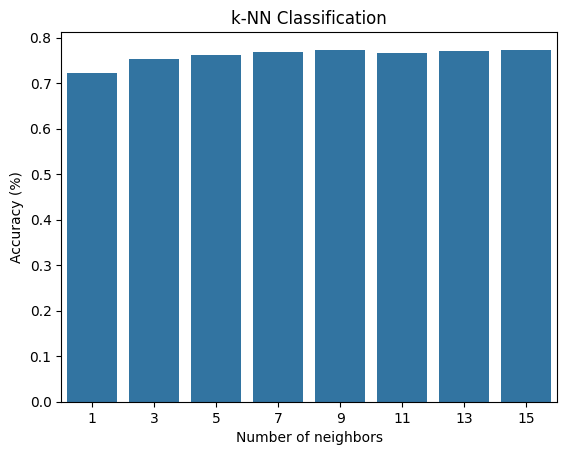

In [18]:
gfg = sns.barplot(x = n_neighbors,y = accuracy)
gfg.set(xlabel ="Number of neighbors", ylabel = "Accuracy (%)", title ='k-NN Classification')

In [19]:
#Re-entrenar el modelo con los datos de entrenamiento y validación para el valor de k óptimo
k_opt = n_neighbors[np.argmax(accuracy)]
print(f"El número óptimo de vecinos es {k_opt}")
X_train = pd.concat([df_train,df_val],axis=0)
y_train = np.hstack([y_train,y_val])

El número óptimo de vecinos es 15


In [20]:
# Entrenar el clasificador con los dapreprocessortos de entrenamiento
clf = Pipeline(steps=[("", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors=k_opt))])
clf.fit(X_train, y_train)


Pipeline(steps=[('',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=15))])

# Evaluar el modelo

In [21]:
#Validar el rendimiento del clasificador con los datos de prueba
accuracy = clf.score(df_test, y_test)


print(f"La tasa de acierto de clasificación KNN en el conjunto de test es {accuracy:0.2f}")

La tasa de acierto de clasificación KNN en el conjunto de test es 0.80


In [22]:
print(clf.predict(df_test.iloc[[0],:])) #clasificar la muestra 0 de test
print(y_test[0])

['No']
No


# Desplegar el modelo

In [23]:
# Crear directorio para los modelos si no existe
os.makedirs(os.path.join(os.getcwd(), 'models'), exist_ok=True)

# Guardar el modelo y el scaler
joblib.dump(clf, os.path.join(os.getcwd(), 'models/housing_model.pkl'))
joblib.dump(clf, os.path.join(os.getcwd(), 'models/scaler.pkl'))

print("Modelo y scaler creados y guardados en la carpeta models/")

Modelo y scaler creados y guardados en la carpeta models/
